## Exercise 1

array([[ 0. ,  1. ,  0.5,  0. , -0.5,  3. ],
       [ 0. ,  0. , -0.5,  0.2,  0.3,  0.8],
       [ 1. ,  0. ,  0. ,  0. ,  1. ,  6. ],
       [ 0. ,  0. ,  0.5,  0. ,  0.5,  9. ]])

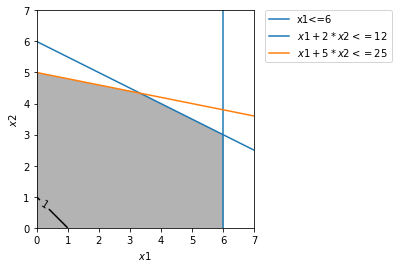

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def f(x1, x2):
    return x1 + x2

# plot the feasible region
d = np.linspace(0,7,300)
x1,x2 = np.meshgrid(d,d)
plt.imshow( ((x1+2*x2<=12) & (x1+5*x2<=25) & (x1<=6)).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)


# plot the lines defining the constraints
x = np.linspace(0, 7, 2000)

# x1+2*x2<=12
# x1/2+x2 <= 6 
# x2 <= 6 - x1/2
y1 = 6 - x/2

# x1+5*x2<=25
# x2 <= 5 - x1/5 
y2 = 5 - x/5

# x1<=6
plt.axvline(x=6, label=r'x1<=6')

# # Make plot
plt.plot(x, y1, label=r'$x1+2*x2<=12$')
plt.plot(x, y2, label=r'$x1+5*x2<=25$')
Z = f(x1, x2)
cs = plt.contour(x1, x2, Z, levels=[1] ,colors='black')
plt.clabel(cs, levels=[1])


plt.xlim(0,7)
plt.ylim(0,7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

A = np.array([
    [1, 2],
    [1, 5],
    [1,0]])
b = np.array([[12, 25, 6]])
c = np.array([[-1,-1]])

def add_row(A,k,j,i):
    "Add k times row j to row i in matrix A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

def scale_row(A,k,i):
    "Multiply row i by k in matrix A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

def switch_rows(A,i,j):
    "Switch rows i and j in matrix A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A
    
A = np.array([
    [1, 2, 1, 0, 0, 12],
    [1, 5, 0, 1, 0, 25],
    [1, 0, 0, 0, 1, 6],
    [-1, -1, 0, 0, 0, 0]])

A = add_row(A, -1, 2, 0)
A = add_row(A, -1, 2, 1)
A = add_row(A, 1, 2, 3)

A = scale_row(A, 1/2, 0)
A = scale_row(A, 1/5, 1)

A = add_row(A, -1, 0, 1)
A = add_row(A, 1, 0, 3)
A
# Ab = A.conjugate()


# linprog(c, A_ub=A, b_ub=b, method="simplex",options={"disp": True})


# Exercise 2